# Week 06: Business Statistics & Analytics - E-commerce Analysis

## Learning Objectives
By the end of this exercise, you will be able to:
- Calculate key business metrics using pandas
- Create meaningful visualizations for business insights
- Apply statistical concepts to real business scenarios
- Make data-driven recommendations

---

## Business Context

You're working as a Data Analyst for **TechMart**, an e-commerce company. Your manager needs insights from last quarter's sales data to inform strategic decisions for the upcoming quarter.

Your analysis will help answer critical questions about customer behavior, regional performance, and product trends that directly impact business growth.

## Dataset Setup

First, let's generate the synthetic dataset you'll be analyzing:

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducible results
np.random.seed(42)

# Generate 500 orders from 2023
n_orders = 500

# Create order IDs and customer data
order_id = np.arange(1, n_orders + 1)
customer_id = np.random.randint(1, 101, size=n_orders)
customer_segment = np.random.choice(["Student", "Professional", "Senior"], size=n_orders, p=[0.4, 0.4, 0.2])
region = np.random.choice(["North", "South", "East", "West"], size=n_orders)
order_date = pd.date_range(start="2023-01-01", periods=n_orders, freq="D")
product_category = np.random.choice(["Electronics", "Clothing", "Books", "Home", "Sports"], size=n_orders)
quantity = np.random.randint(1, 5, size=n_orders)
unit_price = np.round(np.random.uniform(10, 200, size=n_orders), 2)
revenue = quantity * unit_price
discount_applied = np.random.choice([0, 5, 10, 15, 20, 25, 30], size=n_orders, p=[0.5,0.1,0.1,0.1,0.05,0.05,0.1])
payment_method = np.random.choice(["Credit Card", "PayPal", "Gift Card", "Debit Card"], size=n_orders)

# Build dataframe
df = pd.DataFrame({
    "order_id": order_id,
    "customer_id": customer_id,
    "customer_segment": customer_segment,
    "region": region,
    "order_date": order_date,
    "product_category": product_category,
    "quantity": quantity,
    "unit_price": unit_price,
    "revenue": revenue,
    "discount_applied": discount_applied,
    "payment_method": payment_method
})

# Save dataset for reference
df.to_csv("ecommerce_data.csv", index=False)
print("✅ Dataset created successfully!")

# Display first few rows
df.head()

✅ Dataset created successfully!


,order_id,customer_id,customer_segment,region,order_date,product_category,quantity,unit_price,revenue,discount_applied,payment_method
0,1,52,Student,North,2023-01-01,Clothing,1,42.43,42.43,0,Debit Card
1,2,93,Student,West,2023-01-02,Sports,1,24.18,24.18,0,Gift Card
2,3,15,Professional,East,2023-01-03,Sports,3,158.71,476.13,0,Debit Card
3,4,72,Student,East,2023-01-04,Sports,1,60.42,60.42,0,Credit Card
4,5,61,Student,West,2023-01-05,Books,3,43.78,131.34,0,Gift Card


## Data Exploration

Let's start by understanding our dataset:

In [2]:
# Load the data
data = pd.read_csv("ecommerce_data.csv")

# Basic information about the dataset
print("Dataset Info:")
print(data.info())
print("\nDataset Shape:", data.shape)
print("\nFirst few rows:")
data.head()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          500 non-null    int64  
 1   customer_id       500 non-null    int64  
 2   customer_segment  500 non-null    object 
 3   region            500 non-null    object 
 4   order_date        500 non-null    object 
 5   product_category  500 non-null    object 
 6   quantity          500 non-null    int64  
 7   unit_price        500 non-null    float64
 8   revenue           500 non-null    float64
 9   discount_applied  500 non-null    int64  
 10  payment_method    500 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 43.1+ KB
None

Dataset Shape: (500, 11)

First few rows:


,order_id,customer_id,customer_segment,region,order_date,product_category,quantity,unit_price,revenue,discount_applied,payment_method
0,1,52,Student,North,2023-01-01,Clothing,1,42.43,42.43,0,Debit Card
1,2,93,Student,West,2023-01-02,Sports,1,24.18,24.18,0,Gift Card
2,3,15,Professional,East,2023-01-03,Sports,3,158.71,476.13,0,Debit Card
3,4,72,Student,East,2023-01-04,Sports,1,60.42,60.42,0,Credit Card
4,5,61,Student,West,2023-01-05,Books,3,43.78,131.34,0,Gift Card


Monthly Revenue:
month
2023-01    6626.66
2023-02    6796.03
2023-03    8960.10
2023-04    7713.47
2023-05    7266.80
2023-06    7982.47
2023-07    7981.65
2023-08    6664.64
2023-09    9708.06
2023-10    7287.27
2023-11    8795.85
2023-12    8119.44
2024-01    7268.59
2024-02    8388.91
2024-03    6835.73
2024-04    7430.29
2024-05    4314.71
Freq: M, Name: revenue, dtype: float64


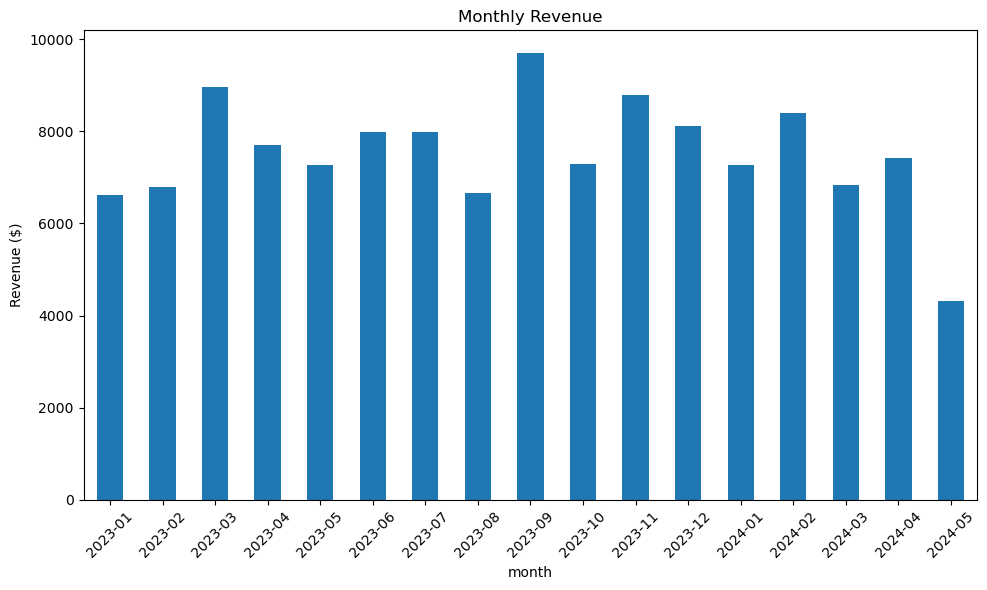

In [3]:
# Convert order_date to datetime and add helpful columns
data["order_date"] = pd.to_datetime(data["order_date"])
data["month"] = data["order_date"].dt.to_period("M")
data["day_of_week"] = data["order_date"].dt.day_name()

# Example: Revenue by month
monthly_revenue = data.groupby("month")["revenue"].sum()
print("Monthly Revenue:")
print(monthly_revenue)

# Plot monthly revenue
monthly_revenue.plot(kind="bar", figsize=(10,6), title="Monthly Revenue")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

---

## Business Questions

Now answer each of the following business questions. Use the starter code above as a reference, and expand your analysis to solve all questions.

### 1. Revenue Overview
What was the company's total revenue last quarter? Break it down by month.

In [5]:
# Your code here
data['order_date'].unique()
monthly_revenue = data.groupby("month")["revenue"].sum()
last_quarter_revenue = monthly_revenue[-3:]

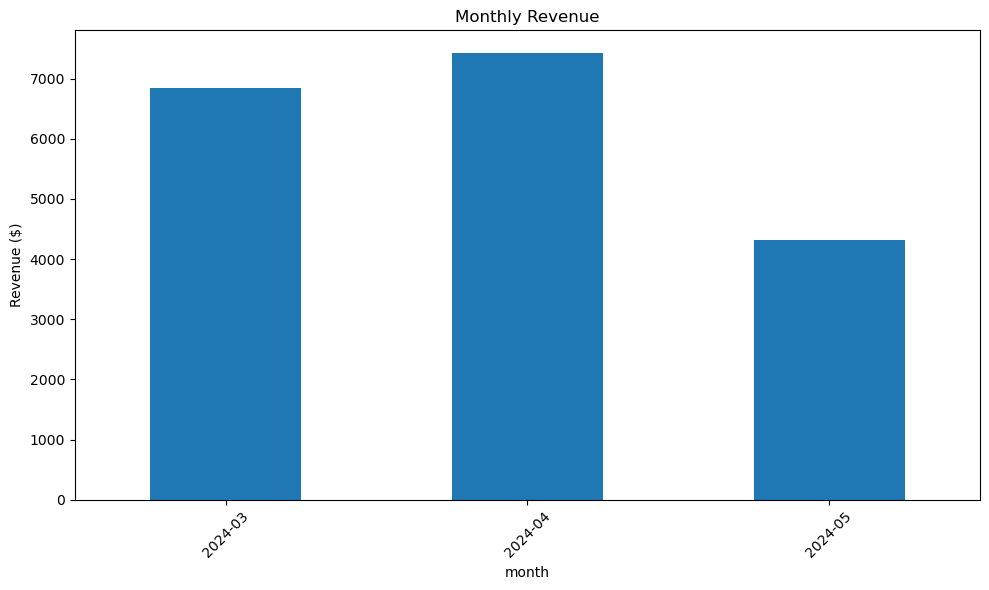

In [6]:
last_quarter_revenue.plot(kind="bar", figsize=(10,6), title="Monthly Revenue")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 2. Top Customers
Who are the top 5 customers by total revenue contribution?

In [8]:
# Your code here
top_customers = data.groupby('customer_id').agg({'revenue':'sum'})[:5].reset_index()

In [10]:
top_customers

,customer_id,revenue
0,1,2343.43
1,2,1986.88
2,3,1687.14
3,4,647.76
4,5,600.33


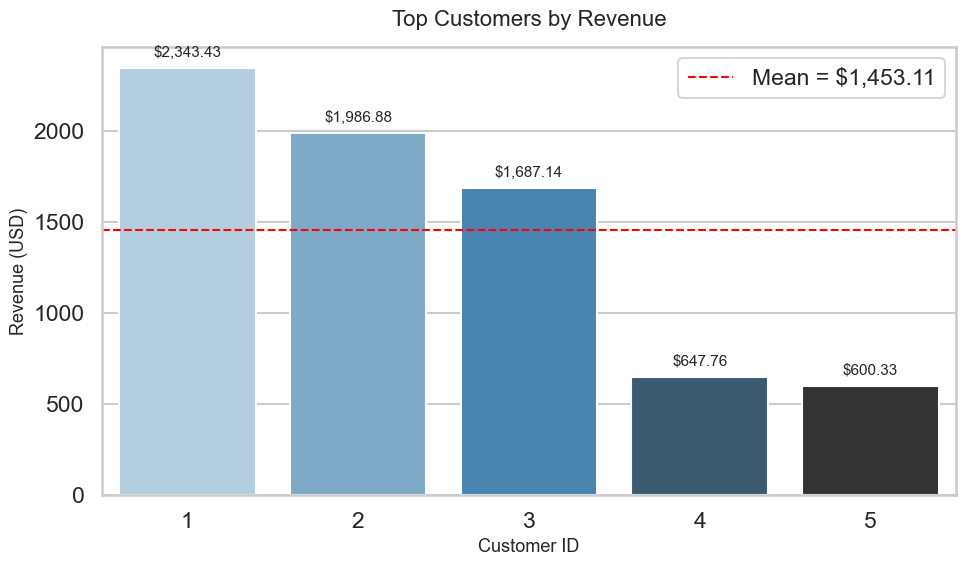

In [15]:
# --- Setup ---
sns.set(style="whitegrid", context="talk")

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x="customer_id",
    y="revenue",
    hue="customer_id",            
    data=top_customers,
    palette="Blues_d",
    legend=False                  
)


for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f"${height:,.2f}",
        (p.get_x() + p.get_width() / 2., height),
        ha="center",
        va="bottom",
        fontsize=11,
        xytext=(0, 6),
        textcoords="offset points"
    )

# Add mean line
mean_revenue = top_customers["revenue"].mean()
ax.axhline(mean_revenue, color="red", linestyle="--", linewidth=1.5, label=f"Mean = ${mean_revenue:,.2f}")

# Labels & Title 
ax.set_title("Top Customers by Revenue", fontsize=16, pad=15)
ax.set_xlabel("Customer ID", fontsize=13)
ax.set_ylabel("Revenue (USD)", fontsize=13)
ax.legend()

plt.tight_layout()
plt.show()


### 3. Segment Analysis
Which customer segment (Student, Professional, Senior) spends the most on average per order?

In [16]:
# Your code here
customer_segments = data.groupby('customer_segment').agg({'revenue':'mean'}).reset_index()

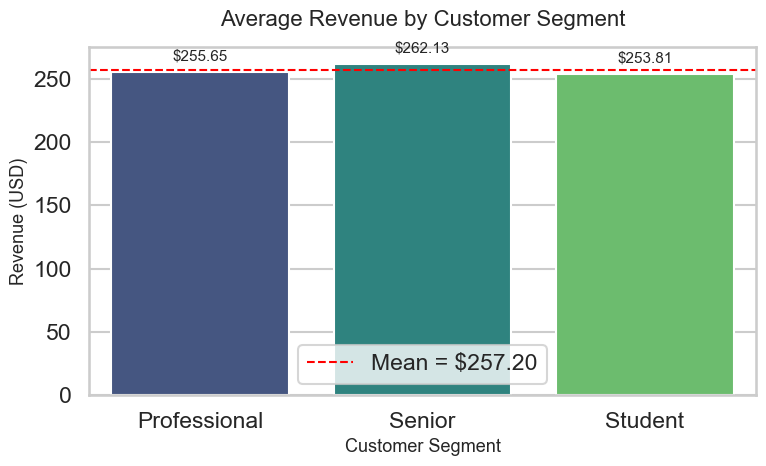

In [19]:
sns.set(style="whitegrid", context="talk")

plt.figure(figsize=(8, 5))
ax = sns.barplot(
    x="customer_segment",
    y="revenue",
    hue="customer_segment",
    data=customer_segments,
    palette="viridis",
    legend=False
)


for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f"${height:,.2f}",
        (p.get_x() + p.get_width() / 2., height),
        ha="center",
        va="bottom",
        fontsize=11,
        xytext=(0, 6),
        textcoords="offset points"
    )

mean_revenue = customer_segments["revenue"].mean()
ax.axhline(mean_revenue, color="red", linestyle="--", linewidth=1.5, label=f"Mean = ${mean_revenue:,.2f}")
ax.set_title("Average Revenue by Customer Segment", fontsize=16, pad=15)
ax.set_xlabel("Customer Segment", fontsize=13)
ax.set_ylabel("Revenue (USD)", fontsize=13)
ax.legend()
plt.tight_layout()
plt.show()

### 4. Regional Trends
Which region generated the highest revenue? Which region had the highest average order size?

In [26]:
# Your code here
region_revenue = data.groupby("region")["revenue"].sum().sort_values(ascending=False).reset_index()
top_revenue_region = region_revenue.idxmax()
print("Highest total revenue region:", top_revenue_region)
print(region_revenue, "\n")

Highest total revenue region: region     3
revenue    0
dtype: int64
  region   revenue
0  South  34839.45
1  North  34351.69
2   East  31221.80
3   West  27727.73 



In [35]:
region_revenue['percentage'] = round(region_revenue['revenue'] /  region_revenue['revenue'].sum()*100,2)

In [36]:
region_revenue

,region,revenue,percentage
0,South,34839.45,27.19
1,North,34351.69,26.81
2,East,31221.80,24.37
3,West,27727.73,21.64


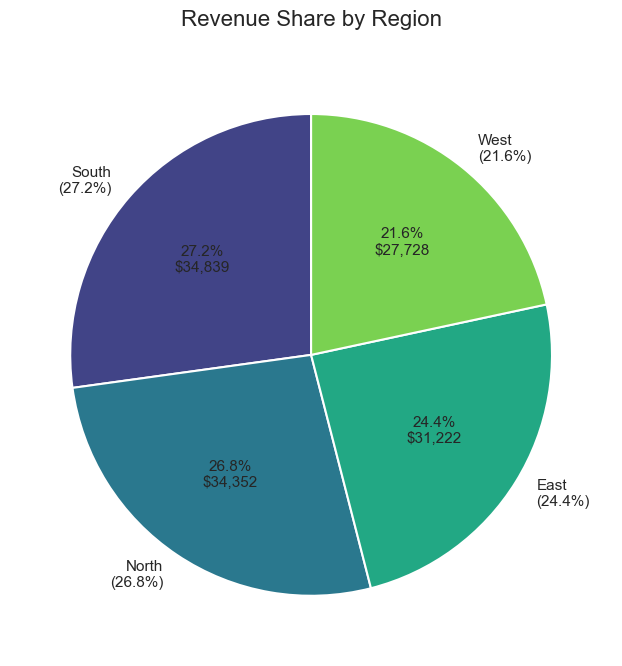

In [37]:
plt.figure(figsize=(7, 7))
colors = plt.cm.viridis([0.2, 0.4, 0.6, 0.8])

def label_format(pct, revenue):
    return f"{pct:.1f}%\n${revenue:,.0f}"

plt.pie(
    region_revenue["revenue"],
    labels=[
        f"{r}\n({p:.1f}%)" for r, p in zip(region_revenue["region"], region_revenue["percentage"])
    ],
    startangle=90,
    colors=colors,
    autopct=lambda pct: label_format(pct, pct * sum(region_revenue["revenue"]) / 100),
    textprops={"fontsize": 11},
    wedgeprops={"edgecolor": "white", "linewidth": 1.5}
)

plt.title("Revenue Share by Region", fontsize=16, pad=20)
plt.tight_layout()
plt.show()

In [40]:
region_avg_order = data.groupby("region")["revenue"].mean().sort_values(ascending=False).reset_index()
region_avg_order['percentage'] = round(region_avg_order['revenue'] / region_avg_order['revenue'].sum() * 100, 1)

In [42]:
region_avg_order

,region,revenue,percentage
0,South,274.326378,26.8
1,North,258.283383,25.2
2,West,252.070273,24.6
3,East,240.167692,23.4


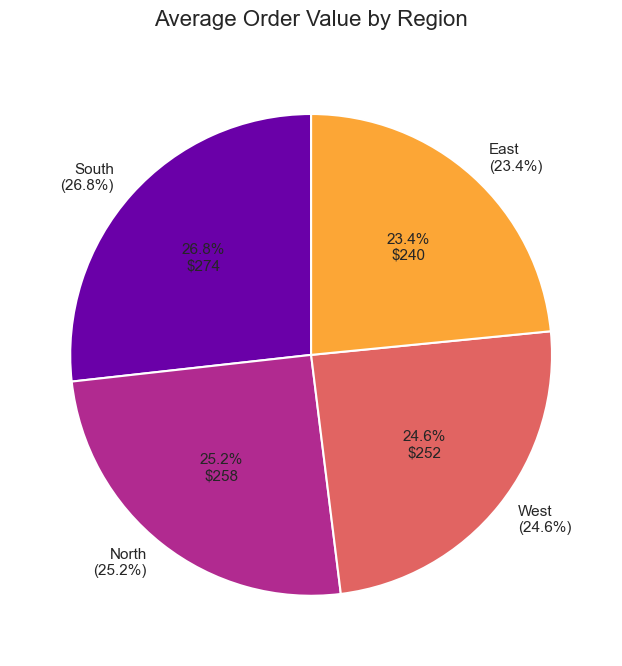

In [43]:
plt.figure(figsize=(7, 7))
colors = plt.cm.plasma([0.2, 0.4, 0.6, 0.8])

def label_format(pct, revenue):
    return f"{pct:.1f}%\n${revenue:,.0f}"

plt.pie(
    region_avg_order["revenue"],
    labels=[
        f"{r}\n({p:.1f}%)" for r, p in zip(region_avg_order["region"], region_avg_order["percentage"])
    ],
    startangle=90,
    colors=colors,
    autopct=lambda pct: label_format(pct, pct * sum(region_avg_order["revenue"]) / 100),
    textprops={"fontsize": 11},
    wedgeprops={"edgecolor": "white", "linewidth": 1.5}
)

plt.title("Average Order Value by Region", fontsize=16, pad=20)
plt.tight_layout()
plt.show()

### 5. Product Category Performance
Which product category is most popular by quantity vs. by revenue?

In [44]:
# Your code here
product_category_quant = data.groupby('product_category')['quantity'].sum().reset_index()
top_product = product_category_quant.idxmax()
print(top_product)
product_category_quant


product_category    4
quantity            3
dtype: int64


,product_category,quantity
0,Books,227
1,Clothing,253
2,Electronics,239
3,Home,269
4,Sports,246


In [45]:
product_category_revenue = data.groupby('product_category')['revenue'].sum().reset_index()
top_product = product_category_quant.idxmax()
print(top_product)
product_category_revenue

product_category    4
quantity            3
dtype: int64


,product_category,revenue
0,Books,24046.06
1,Clothing,24804.57
2,Electronics,25498.31
3,Home,29871.47
4,Sports,23920.26


C:\Users\Bagdo\AppData\Local\Temp\ipykernel_13216\2392803987.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


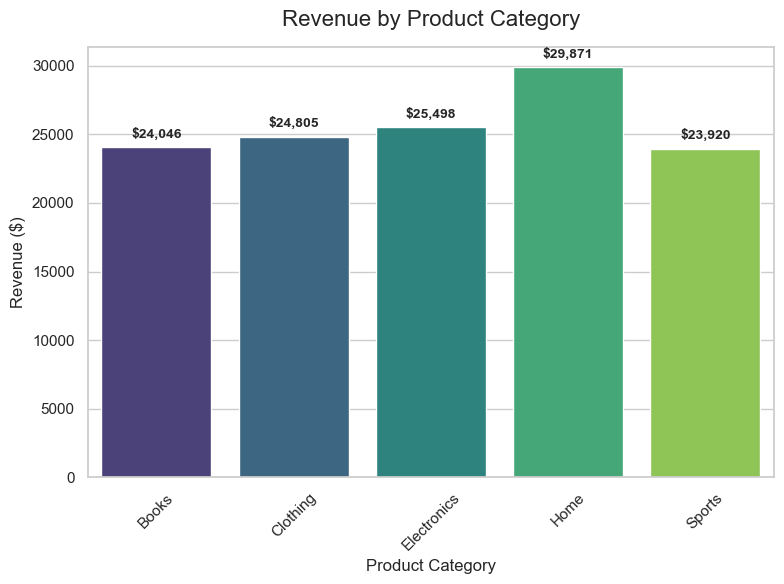

In [47]:
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

ax = sns.barplot(
    data=product_category_revenue,
    x="product_category",
    y="revenue",
    palette="viridis"
)

# Add value labels on top of bars
for i, row in product_category_revenue.iterrows():
    ax.text(
        i,
        row["revenue"] + 500,  # small offset above the bar
        f"${row['revenue']:,.0f}",
        ha="center",
        va="bottom",
        fontsize=10,
        fontweight="bold"
    )

# --- Formatting ---
plt.title("Revenue by Product Category", fontsize=16, pad=15)
plt.xlabel("Product Category", fontsize=12)
plt.ylabel("Revenue ($)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 6. Discount Effectiveness
Do discounted orders generate higher or lower revenue per order compared to non-discounted orders?

In [51]:
# Your code here
# Compare discounted vs non-discounted average revenue per order
discount_comparison = (
    data.groupby(data['discount_applied'] > 0).agg(avg_revenue_per_order = ('revenue','mean'),
                                                   total_revenue = ('revenue','sum'))
    .reset_index()
    .rename(columns={'discount_applied': 'is_discounted'})
)


In [52]:
discount_comparison

,is_discounted,avg_revenue_per_order,total_revenue
0,False,248.296337,60336.01
1,True,263.831362,67804.66


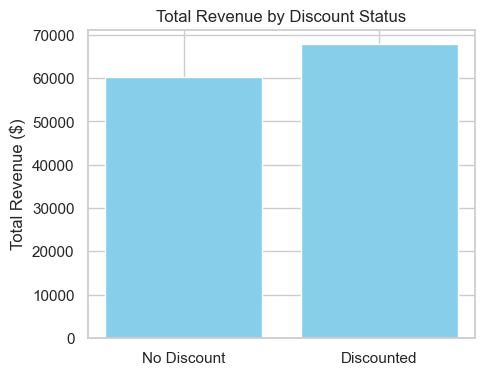

In [56]:
plt.figure(figsize=(5,4))
plt.bar(['No Discount', 'Discounted'], discount_comparison['total_revenue'], color='skyblue')
plt.ylabel('Total Revenue ($)')
plt.title('Total Revenue by Discount Status')
plt.show()


### 7. Payment Method Usage
What percentage of orders use each payment method? Does any payment method correlate with higher spending?

In [62]:
# Your code here
payments_usage = data['payment_method'].value_counts().reset_index()
payments_usage['percentage'] = round((payments_usage['count'] / payments_usage['count'].sum()) * 100, 2)

In [63]:
payments_usage

,payment_method,count,percentage
0,Credit Card,137,27.4
1,Gift Card,124,24.8
2,Debit Card,123,24.6
3,PayPal,116,23.2


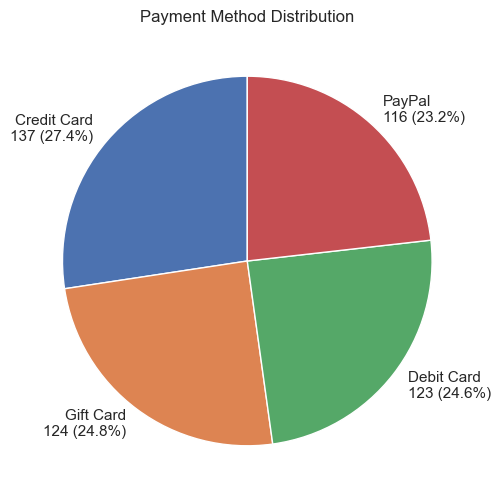

In [64]:
labels_with_values = [f"{l}\n{c} ({p}%)" for l, c, p in zip(labels, counts, percentages)]

plt.figure(figsize=(6,6))
plt.pie(counts, labels=labels_with_values, autopct='', startangle=90)
plt.title('Payment Method Distribution')
plt.show()


In [65]:
avg_revenue_by_payment = (
    data.groupby('payment_method')['revenue']
    .mean()
    .reset_index()
    .rename(columns={'revenue': 'avg_revenue_per_order'})
)
payment_summary = payments_usage.merge(avg_revenue_by_payment, on='payment_method')

In [66]:
payment_summary

,payment_method,count,percentage,avg_revenue_per_order
0,Credit Card,137,27.4,257.444234
1,Gift Card,124,24.8,254.362500
2,Debit Card,123,24.6,275.980650
3,PayPal,116,23.2,236.071034


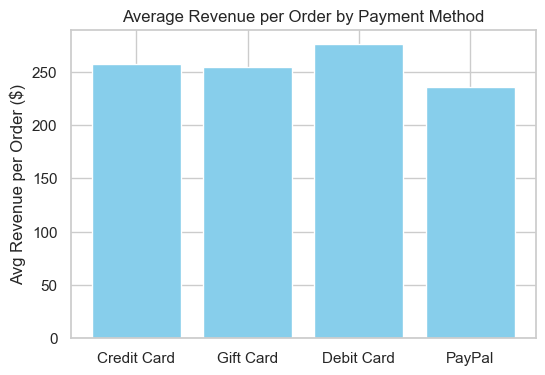

In [69]:
plt.figure(figsize=(6,4))
plt.bar(payment_summary['payment_method'], payment_summary['avg_revenue_per_order'], color='skyblue')
plt.ylabel('Avg Revenue per Order ($)')
plt.title('Average Revenue per Order by Payment Method')
plt.show()

### 8. Seasonality Check
Plot revenue by day of week — are weekends busier than weekdays?

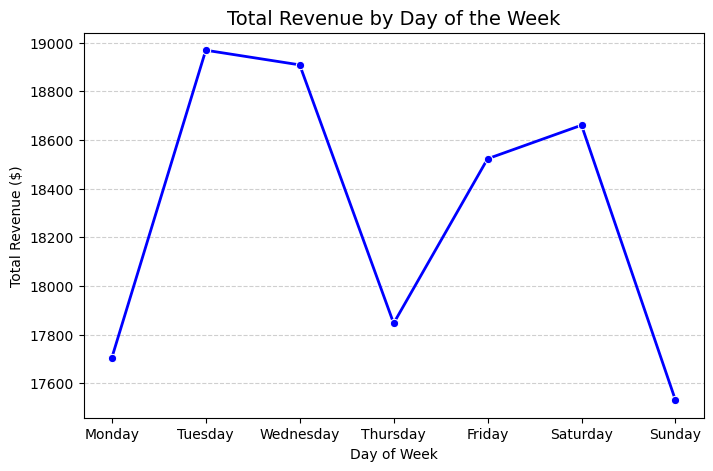

In [89]:
revenue_by_day = data.groupby('day_of_week')['revenue'].sum().reset_index()

# Ensure correct weekday order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
revenue_by_day['day_of_week'] = pd.Categorical(revenue_by_day['day_of_week'], categories=day_order, ordered=True)
revenue_by_day = revenue_by_day.sort_values('day_of_week')

plt.figure(figsize=(8,5))
sns.lineplot(data=revenue_by_day, x='day_of_week', y='revenue', marker='o', linewidth=2, color='blue')

plt.title("Total Revenue by Day of the Week", fontsize=14)
plt.xlabel("Day of Week")
plt.ylabel("Total Revenue ($)")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


### 9. Profitability (Stretch)
Assume profit margin = 20% of revenue. Estimate total profit and identify the most profitable region.

In [91]:
data['profit'] = data['revenue'] * 0.2

# Total profit
total_profit = data['profit'].sum()
print(f"Total Profit: ${total_profit:.2f}")

# Profit by region
profit_by_region = data.groupby('region')['profit'].sum().reset_index()

# Most profitable region
most_profitable_region = profit_by_region.loc[profit_by_region['profit'].idxmax()]
print(f"Most Profitable Region: {most_profitable_region['region']} with profit ${most_profitable_region['profit']:.2f}")


Total Profit: $25628.13
Most Profitable Region: South with profit $6967.89


### 10. Business Recommendation
Based on your findings, recommend one strategy (e.g., focus on certain customer segments, increase discounts, promote specific regions/products).

**Your recommendation here:**

Write your analysis and recommendation based on the insights you discovered from the data.

**Based on the analysis of the sales data:**

- 1\) **Most profitable region**: The **South** region generated the highest total revenue and profit, indicating a strong customer base and purchasing power in that area.
- 2\) **Discount effectiveness**: Orders with discounts generated higher average revenue per order, suggesting that targeted promotions can drive incremental sales.
- 3\) **Popular products**: The Home category leads in both revenue and quantity sold, making it a key focus for promotions.
- 4\) **Payment methods**: Debit card users have the highest average revenue per order, so campaigns encouraging this payment method could slightly boost spending.
- 5\) **Seasonality**: Midweek (Tuesday–Wednesday) shows slightly higher revenue than weekends, indicating potential to optimize marketing efforts and promotions during weekdays.
- 5\) **Top-spending segments**: While all segments contribute, Senior and Professional customers spend slightly more per order on average compared to Students.

---

## Submission Requirements

1. **Complete code** for all 10 questions
2. **Clear visualizations** where appropriate  
3. **Brief interpretation** of each result
4. **Final business recommendation** with supporting data

Remember: Focus on what the numbers tell us about the business, not just the calculations themselves.